# Import the library

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree

%matplotlib inline

# Load the dataset 

In [6]:
# Load dataset
dataset = pd.read_csv('heart.csv')
print(dataset.head(5))

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


# Check the features available in dataset and their data type 

In [7]:
# Check the features of dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# Check missing value and null value 

In [8]:
# Check the null value or missing value in dataset
dataset.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Dataset dimensionality

In [9]:
dataset.shape

(303, 14)

# Dataset describe

In [10]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


The features described in the above data set are: count indicates the number of non-empty rows in a feature. Mean tells us the mean value of that feature. Std tells us the Standard Deviation Value of that feature. Min tells us the minimum value of that feature. Whereas 25%, 50%, and 75% are the percentile/quartile of each features and lastly Max tells us the maximum value of that feature.

# Visualize some features in dataset

First, let's try plot the histogram of `age` according to `sex`.Sex consists of female(0) and male(1). We will use [`sns.histplot`](https://seaborn.pydata.org/generated/seaborn.histplot.html) to plot the histogram. Below is an example:

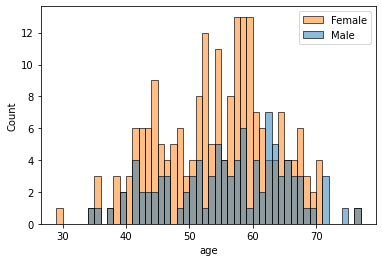

In [11]:
sns.histplot(x='age', data=dataset, hue='sex', binwidth=1)
plt.legend(loc='upper right', labels=['Female','Male'])

Next, try to plot Cholestrol rate `chol` according to `sex`.

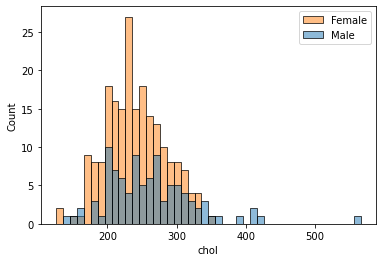

In [13]:
sns.histplot(x='chol', data=dataset, hue='sex', binwidth=10)
plt.legend(loc='upper right', labels=['Female','Male'])

Seaborn is a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics. We use seaborn also to plot the barchart using method [`sns.barplot`](https://seaborn.pydata.org/generated/seaborn.barplot.html)

<AxesSubplot:xlabel='cp', ylabel='age'>

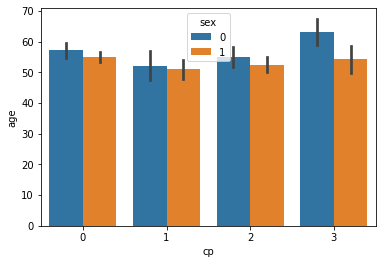

In [14]:
sns.barplot(x='cp', y='age', data=dataset, hue='sex', dodge=True)
#plt.legend(loc='upper right', labels=['Female','Male'])


# Correlation Matrix

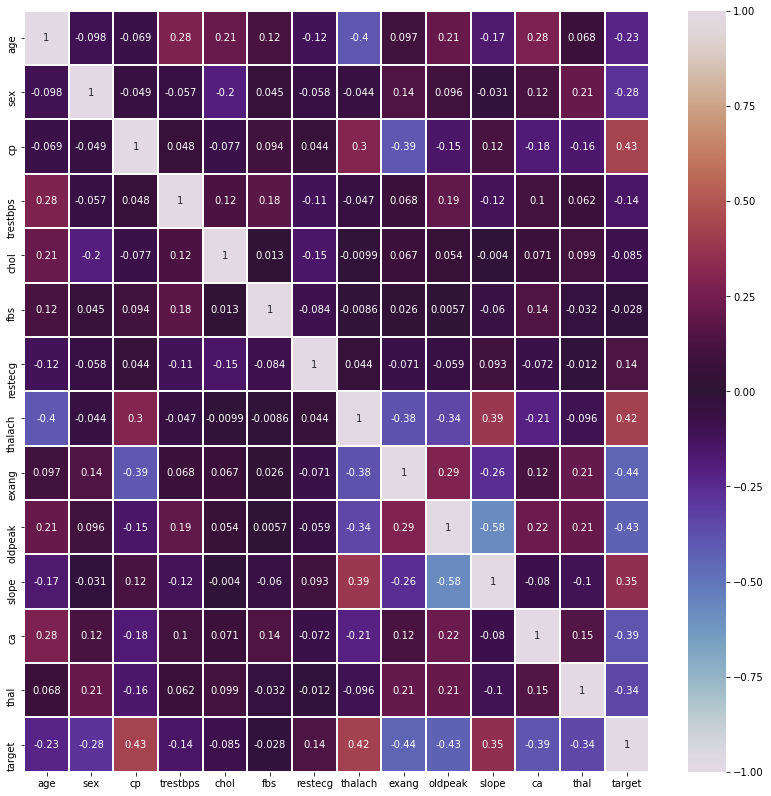

In [16]:
plt.figure(figsize=(14,14))
sns.heatmap(dataset.corr(), annot = True, cmap='twilight',linewidths=.1, vmin=-1,vmax=1)
plt.show()

# Count plot

Show the counts of observations in each categorical bin using bars.

A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable. The basic API and options are identical to those for barplot(), so you can compare counts across nested variables. You can use [`sns.countplot`](https://seaborn.pydata.org/generated/seaborn.countplot.html)

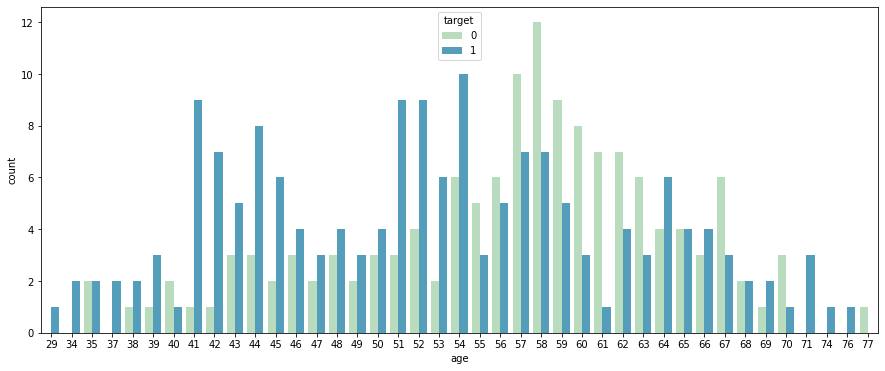

In [17]:
plt.figure(figsize=(15,6))
sns.countplot(x='age',data = dataset, hue = 'target',palette='GnBu')
plt.show()

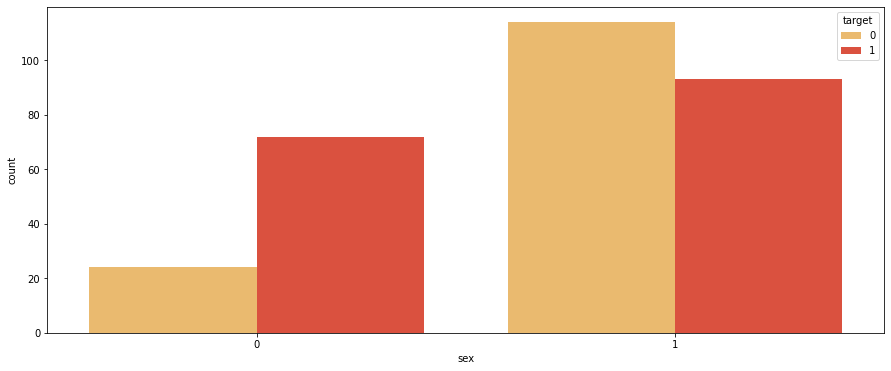

In [18]:
plt.figure(figsize=(15,6))
sns.countplot(x='sex',data = dataset, hue = 'target',palette='YlOrRd')
plt.show()

# Scatter Plot

In [`sns.scatterplot`](https://seaborn.pydata.org/generated/seaborn.scatterplot.html), we can use to plot relationship between x and y can be shown for different subsets of the data.

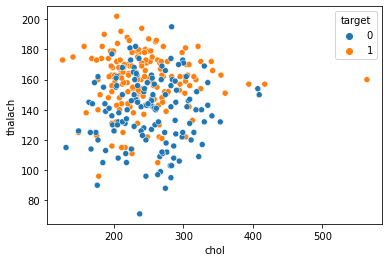

In [19]:
sns.scatterplot(x='chol',y='thalach',data=dataset,hue='target')
plt.show()

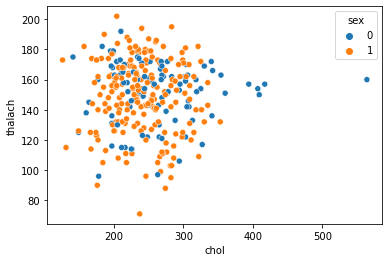

In [20]:
sns.scatterplot(x='chol',y='thalach',data=dataset,hue='sex')
plt.show()

# Split the dataset into training and testing sets

Assign the features,`X` and target variable,`y` as below:

In [22]:
X= dataset.drop('target',axis=1) # Features
y=dataset['target'] #target variable

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=42)

# Decision Tree Classifier

In [24]:
clf = tree.DecisionTreeClassifier() #Initialize the model

In [25]:
clf.fit(X_train,y_train) #fit the model to the training set

DecisionTreeClassifier()

In [27]:
predict_test = clf.predict(X_test) #Make prediction
predict_train = clf.predict(X_train)


Let's check the accuracy of the test and train

In [29]:
from sklearn.metrics import accuracy_score,confusion_matrix
print('Accuracy Train Score: ',accuracy_score(y_train,predict_train))
print('Using DT we get an accuracy Train score of: ',
      round(accuracy_score(y_train,predict_train),5)*100,'%')
print('Accuracy Test Score: ',accuracy_score(y_test,predict_test))
print('Using DT we get an accuracy Test score of: ',
      round(accuracy_score(y_test,predict_test),5)*100,'%')

Accuracy Train Score:  1.0
Using DT we get an accuracy Train score of:  100.0 %
Accuracy Test Score:  0.819672131147541
Using DT we get an accuracy Test score of:  81.967 %


Now, check the accuracy between test and train. We found the accuracy of train is 100%, this difference with test accuracy about 18%. It is quite huge. This means our model is overfitting and well training. Let's see classification report of train and test.

In [30]:
from sklearn.metrics import classification_report

In [31]:
print(classification_report(y_train,predict_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       109
           1       1.00      1.00      1.00       133

    accuracy                           1.00       242
   macro avg       1.00      1.00      1.00       242
weighted avg       1.00      1.00      1.00       242



In [32]:
print(classification_report(y_test,predict_test))

              precision    recall  f1-score   support

           0       0.76      0.90      0.83        29
           1       0.89      0.75      0.81        32

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61



# Confusion Matrix

In [33]:
cnf_matrix = confusion_matrix(y_test,predict)
cnf_matrix

array([[26,  3],
       [ 8, 24]])

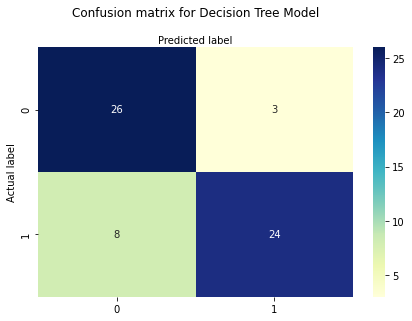

In [57]:
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

#create a heat map
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'YlGnBu',
           fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for Decision Tree Model', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# ROC curve

In [35]:
from sklearn.metrics import roc_auc_score,roc_curve

In [40]:
#Get predicted probabilites from the model
y_probabilities = clf.predict_proba(X_test)[:,1]
#Calculate area under the curve
AUC = roc_auc_score(y_test,y_probabilities)

In [41]:
#Create true and false positive rates
false_positive_rate_DT,true_positive_rate_DT,threshold_DT = roc_curve(y_test,y_probabilities)

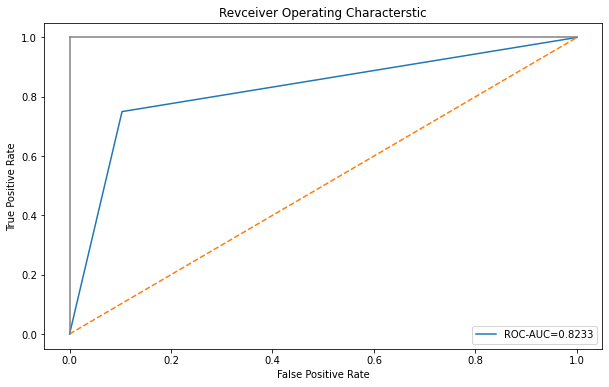

In [42]:
#Plot ROC Curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_DT,true_positive_rate_DT, label='ROC-AUC=%.4f'% AUC)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Overcome overfitting

In [43]:
params = {'criterion':['gini','entropy'],
    'splitter':['best','random'],
    'max_depth':[2,3,4,5,6,7,8],
    'min_samples_leaf':[2,3,4,5,6,7,8]
         }

In [47]:
from sklearn.model_selection import GridSearchCV

model = tree.DecisionTreeClassifier()
model = GridSearchCV(clf,params,cv=5, n_jobs=-1)


In [48]:
model.fit(X_train,y_train)
model.best_params_           #print's parameters best values

{'criterion': 'entropy',
 'max_depth': 7,
 'min_samples_leaf': 5,
 'splitter': 'random'}

In [49]:
predict_train_opt = model.predict(X_train) #Make prediction
predict_test_opt = model.predict(X_test)

In [51]:
print('Accuracy optimize Train Score: ',accuracy_score(y_train,predict_train_opt))
print('Using DT we get an accuracy score of: ',
      round(accuracy_score(y_train,predict_train_opt),5)*100,'%')
print('Accuracy optimize Test Score: ',accuracy_score(y_test,predict_test_opt))
print('Using DT we get an accuracy score of: ',
      round(accuracy_score(y_test,predict_test_opt),5)*100,'%')

Accuracy optimize Train Score:  0.871900826446281
Using DT we get an accuracy score of:  87.19 %
Accuracy optimize Test Score:  0.819672131147541
Using DT we get an accuracy score of:  81.967 %


In [52]:
cnf_matrix_opt = confusion_matrix(y_test,predict_test_opt)
cnf_matrix

array([[26,  3],
       [ 8, 24]])

Classification report for optimized model

In [53]:
print(classification_report(y_train,predict_train_opt))

              precision    recall  f1-score   support

           0       0.88      0.83      0.85       109
           1       0.87      0.90      0.89       133

    accuracy                           0.87       242
   macro avg       0.87      0.87      0.87       242
weighted avg       0.87      0.87      0.87       242



In [54]:
print(classification_report(y_test,predict_test_opt))

              precision    recall  f1-score   support

           0       0.76      0.90      0.83        29
           1       0.89      0.75      0.81        32

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61



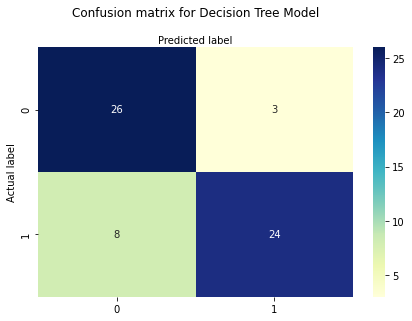

In [56]:
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

#create a heat map
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'YlGnBu',
           fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for Decision Tree Model', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [58]:
#Get predicted probabilites from the model
y_probabilities_opt = model.predict_proba(X_test)[:,1]

In [59]:
#Calculate area under the curve
AUC_opt = roc_auc_score(y_test,y_probabilities_opt)

In [60]:
#Create true and false positive rates
false_positive_rate_DT_opt,true_positive_rate_DT_opt,threshold_DT_opt = roc_curve(y_test,y_probabilities_opt)

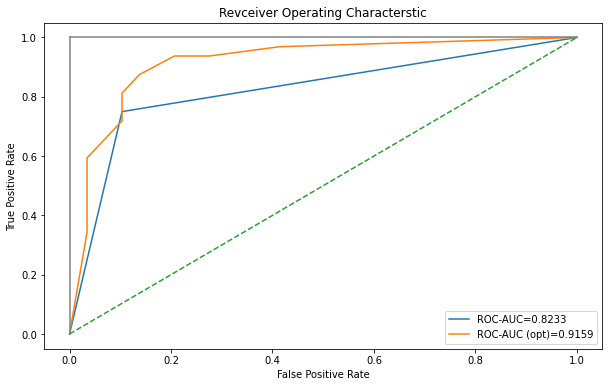

In [61]:
#Plot ROC Curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_DT,true_positive_rate_DT, label='ROC-AUC=%.4f'% AUC)
plt.plot(false_positive_rate_DT_opt,true_positive_rate_DT_opt, label='ROC-AUC (opt)=%.4f'% AUC_opt)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Features Importance

In [64]:
#Plot Feature Importances
feature_importances = model.best_estimator_.feature_importances_

In [67]:
# Create a dataframe of feature importance 
df_feature_importance = pd.DataFrame({'Feature_names':['age','sex','cp','trestbps','chol','fbs','restecg',
                                                       'thalach','exang','oldpeak','slope','ca','thal'], 'Importances':feature_importances})
# Sort the feature importance in descending order
#
df_feature_importance = df_feature_importance.sort_values(by='Importances', ascending=False)
print(df_feature_importance)

   Feature_names  Importances
2             cp     0.276291
11            ca     0.203116
8          exang     0.111904
1            sex     0.108893
0            age     0.083540
10         slope     0.083283
9        oldpeak     0.062174
12          thal     0.030665
3       trestbps     0.021897
5            fbs     0.010085
6        restecg     0.004511
7        thalach     0.003642
4           chol     0.000000


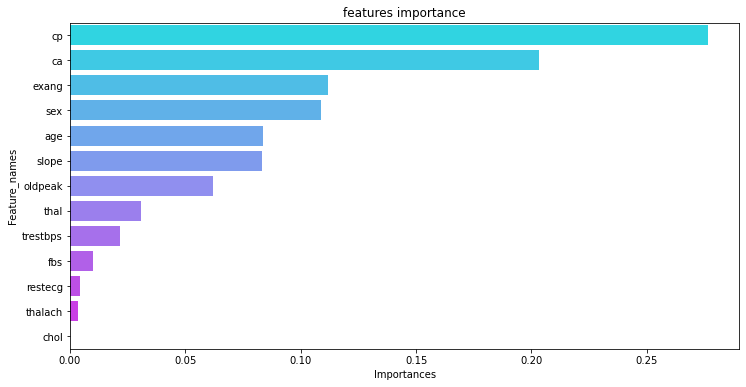

In [68]:
#plotting feature importance
fig28 = plt.figure(figsize=(12,6))
ax28 = fig28.add_subplot()
feature_plot= sns.barplot(x="Importances", y="Feature_names", data=df_feature_importance,palette="cool");
plt.title('features importance');
plt.rc('figure', max_open_warning = 0)
plt.savefig("Feature_importance.pdf")